# 4.9 Into to Data Visualisation with Python - Part 2

### Contents List
#### 1. Import Libraries
#### 2. Import data & run checks
#### 3. Sample data
#### 4. Exercise 4.9 Visualizations - Bar Chart, Histogram, Scatterplot & Line graph
#### 5. Histogram of the “order_hour_of_day”
#### 6. loyalty_flag bar chart
#### 7. Expenditure vs time of day line chart
#### 8. Exploratory analysis of customer demographics

### 1. Import Libraries

In [1]:
#Import Analysis and visualisation libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Import data & run checks

In [2]:
#Create folder path
path = r'C:\Users\Utilizador\OneDrive\Documents\CareerFoundry - Data Analyst\Data Immersion\A4\19-01-2024 Instacart Basket Analysis'

In [3]:
#Import data
ords_prods = pd.read_pickle (os.path.join(path, '02 Data','Prepared Data','ords_prods_all.pkl'))

In [4]:
pd.options.display.float_format = '{:.4f}'.format

In [5]:
#Check data
ords_prods.shape

(32404859, 33)

In [6]:
ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,is_first_order,product_id,add_to_cart_order,reordered,...,order_frequecy,first_name,surname,gender,state,age,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,1,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0000,0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0000,0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0000,0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0000,0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


In [7]:
ords_prods.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'is_first_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_order_price', 'spending_flag', 'order_behavior', 'order_frequecy',
       'first_name', 'surname', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income', '_merge'],
      dtype='object')

### 3. Sample Data

In [5]:
np.random.seed(4)

In [6]:
#Create a list holding True/False values to the test np.random.rand(len(ords_prods)) <= 0.7
dev = np.random.rand(len(ords_prods)) <= 0.7

In [7]:
#Split the data into two samples based on above boolean list
big = ords_prods[dev]

In [8]:
small = ords_prods[~dev]

In [12]:
big.shape

(22683761, 33)

In [13]:
small.shape

(9721098, 33)

Both samples add up to the ords_prods dataframe

### 4. Exercise 4.9 Visualizations

#### Bar Chart

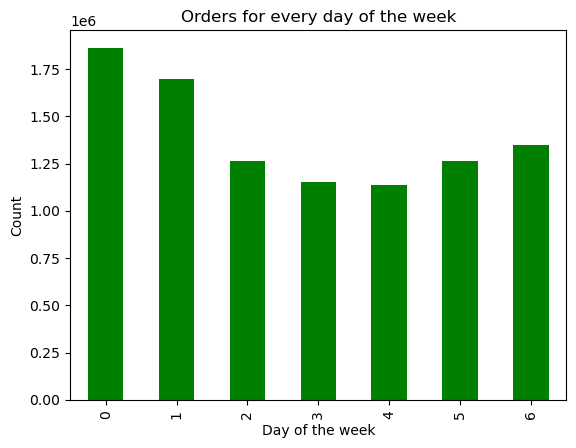

In [14]:
# Bar chart of order for every day of the week
dow_bar = small['orders_day_of_week'].value_counts().sort_index().plot.bar(color = 'green')
plt.xlabel("Day of the week")
plt.ylabel("Count")
plt.title("Orders for every day of the week")
plt.show()

In [15]:
#Export Visualisation
dow_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_dow.png'))

#### Histogram

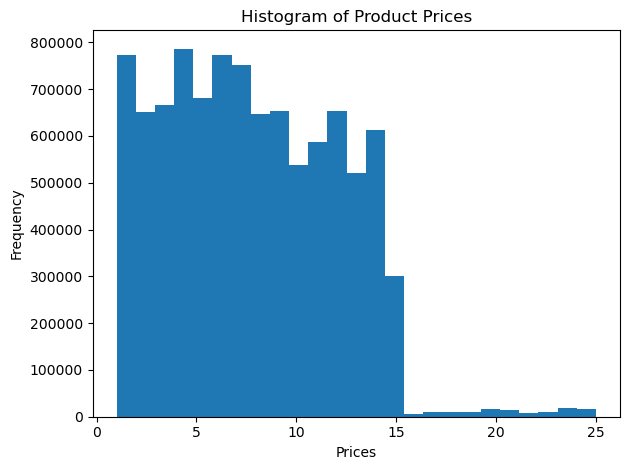

In [16]:
#Histogram of product price distribution
hist_price = small['prices'].plot.hist(bins=25)
plt.xlabel("Prices")
plt.title("Histogram of Product Prices")
plt.tight_layout()
plt.show()

In [17]:
#Export Visualisation
hist_price.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_prices.png'))

#### Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

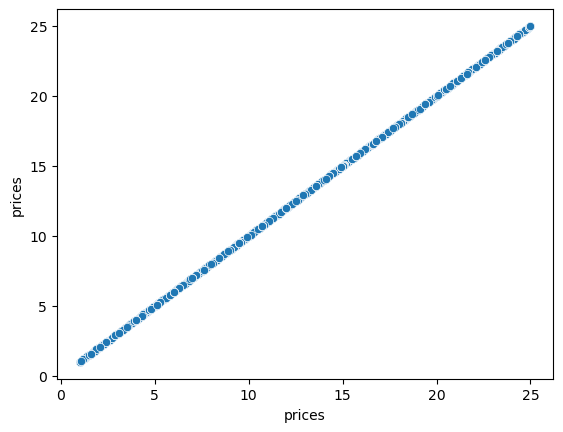

In [18]:
#Scatterplot of prices
sns.scatterplot(x='prices',y='prices',data=small)

#### Line Graph

In [19]:
#Create a subset of the small sample containing only the columns needed for chart
small_2 = small[['orders_day_of_week','prices','order_hour_of_day']]

C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


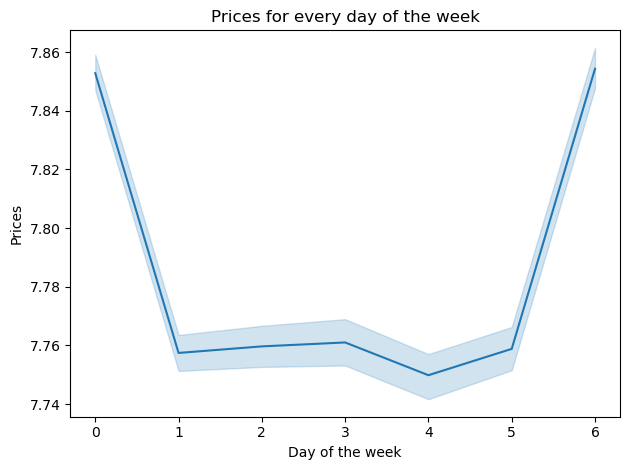

In [20]:
#Line graph of prices for every day of the week
line_price_dow = sns.lineplot (data = small_2, x = 'orders_day_of_week', y = 'prices')
plt.xlabel("Day of the week")
plt.ylabel("Prices")
plt.title("Prices for every day of the week")
plt.tight_layout()
plt.show()

In [21]:
#Export Visualisation
line_price_dow.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_price_dow.png'))

### 5. Histogram of the “order_hour_of_day”

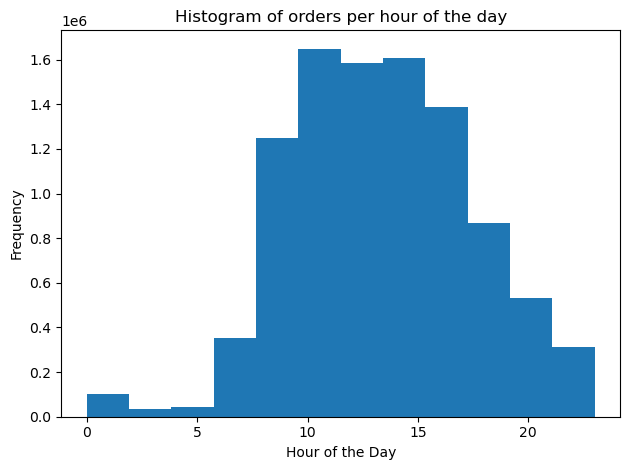

In [22]:
hist_orders_hours = small['order_hour_of_day'].plot.hist(bins=12)
plt.xlabel("Hour of the Day")
plt.title("Histogram of orders per hour of the day")
plt.tight_layout()
plt.show()

In [23]:
#Export Visualisation
hist_orders_hours.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist_orders_hours.png'))

### 6. loyalty_flag bar chart

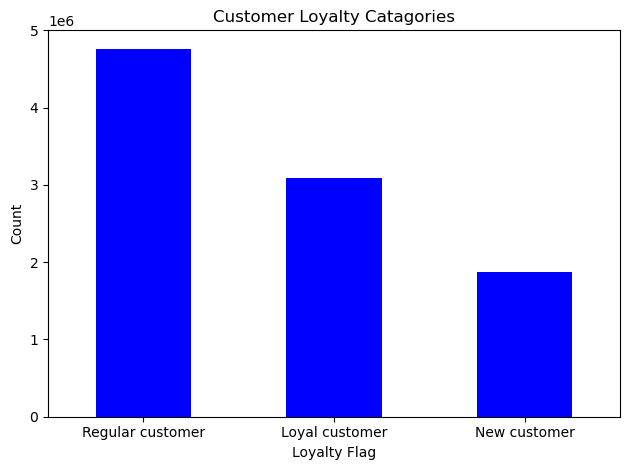

In [11]:
loyalty_flag_bar = small['loyalty_flag'].value_counts().plot.bar(color = 'blue', rot = 0)
plt.xlabel("Loyalty Flag")
plt.ylabel("Count")
plt.title("Customer Loyalty Catagories")
plt.tight_layout()
plt.show()

In [12]:
#Export Visualisation
loyalty_flag_bar.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyalty_flag_chart.png'))

### 7. Expenditure vs time of day line chart

In [26]:
#Create a subset of the small sample containing only the columns needed for chart
small_3 = small[['order_hour_of_day','prices']]

In [27]:
small_3

,order_hour_of_day,prices
0,8,9.0000
2,12,9.0000
3,7,9.0000
6,9,9.0000
10,8,12.5000
...,...,...
32404841,12,10.7000
32404842,3,10.7000
32404843,1,10.7000
32404849,18,10.7000


C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


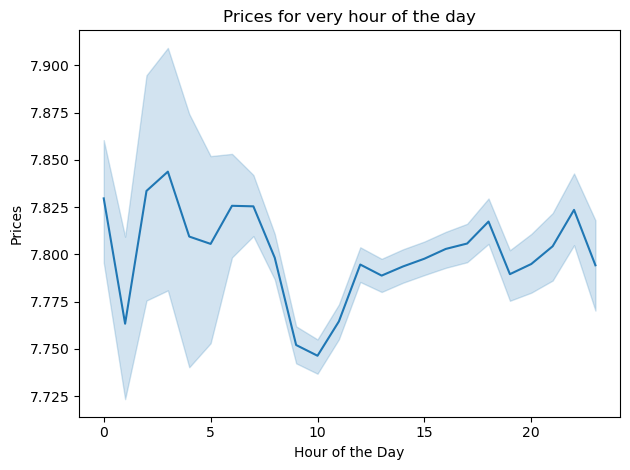

In [28]:
#Line graph of prices for every hour of the day
line_price_hour = sns.lineplot (data = small_3, x = 'order_hour_of_day', y = 'prices')
plt.xlabel("Hour of the Day")
plt.ylabel("Prices")
plt.title("Prices for very hour of the day")
plt.tight_layout()
plt.show()

In [29]:
#Export Visualisation
line_price_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','line_prices_hours.png'))

### 8. Exploratory analysis of customer demographics

#### Connection between age and family situation

In [30]:
#Create a subset of the small sample containing only the columns needed for chart
small_4 = small[['age','n_dependants']]

In [31]:
small_4

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utilizador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


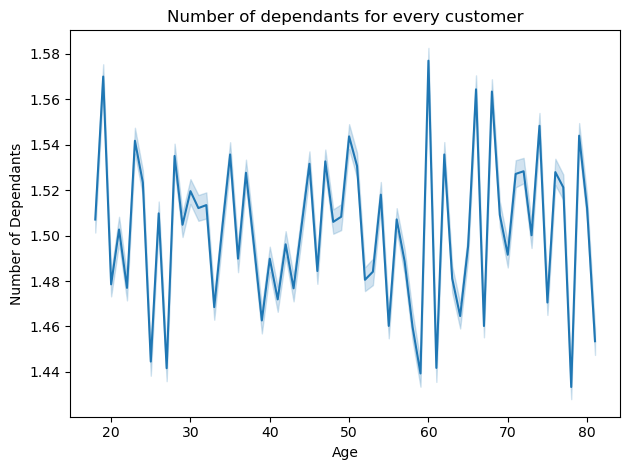

In [32]:
#Create line chart
age_depen_line = sns.lineplot (data = small_4, x = 'age', y = 'n_dependants')
plt.xlabel("Age")
plt.ylabel("Number of Dependants")
plt.title("Number of dependants for every customer")
plt.tight_layout()
plt.show()

The number of dependants and age don´t seem to have any connection. The graph is very sporadic and without a trend pattern.

In [33]:
#Export Visualisation
age_depen_line.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dep_age_line.png'))

#### Connection between age and spending power (income)

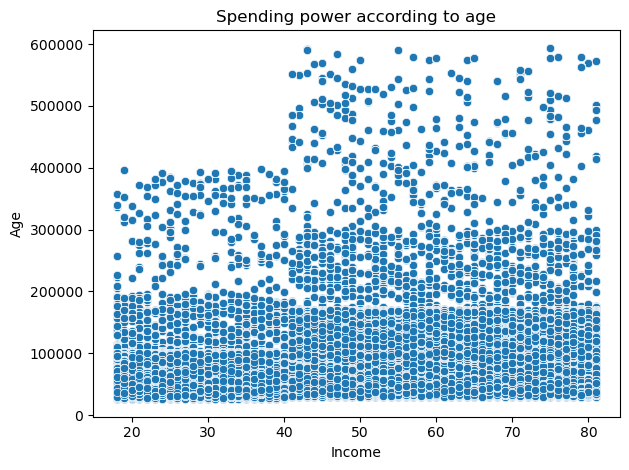

In [34]:
age_income_scat = sns.scatterplot(x='age',y='income',data=small)
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Spending power according to age")
plt.tight_layout()
plt.show()

A big portion of customers between 18 and 85 earn incomes between 25000 and 200,000.00. There are more customers within the income bracket of 200,000.00 to 300,000.00 between the ages of 40 and 80 than any other ages.

In [35]:
#Export Visualisation
age_income_scat .figure.savefig(os.path.join(path,'04 Analysis','Visualizations','scat_income_age.png'))

#### Crosstable and visualization to determine ordering habits based on loyalty_flag

In [13]:
#Cross table between 'Loyalty_flag' and 'department_id'
ct_loyal_deprt = pd.crosstab (ords_prods['loyalty_flag'], ords_prods['department_id'],dropna=False)

In [16]:
ct_loyal_deprt

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
loyalty_flag,,,,,,,,,,,,,,,,,,,,,
Loyal customer,609460,10715,379873,3147376,38723,78394,855017,25469,242580,13834,...,202480,560402,221577,294594,1830707,196873,167108,943150,324046,18350
New customer,485283,7719,223704,1736622,37698,57103,512871,20536,189327,5271,...,146610,392240,138362,236180,971621,166926,60118,534251,205750,17090
Regular customer,1140000,17857,568851,4595293,77275,133756,1320235,51711,434720,15468,...,359837,922727,343094,537284,2596419,374867,196576,1410149,521453,33705


In [21]:
ct_loyal_deprt.to_clipboard()

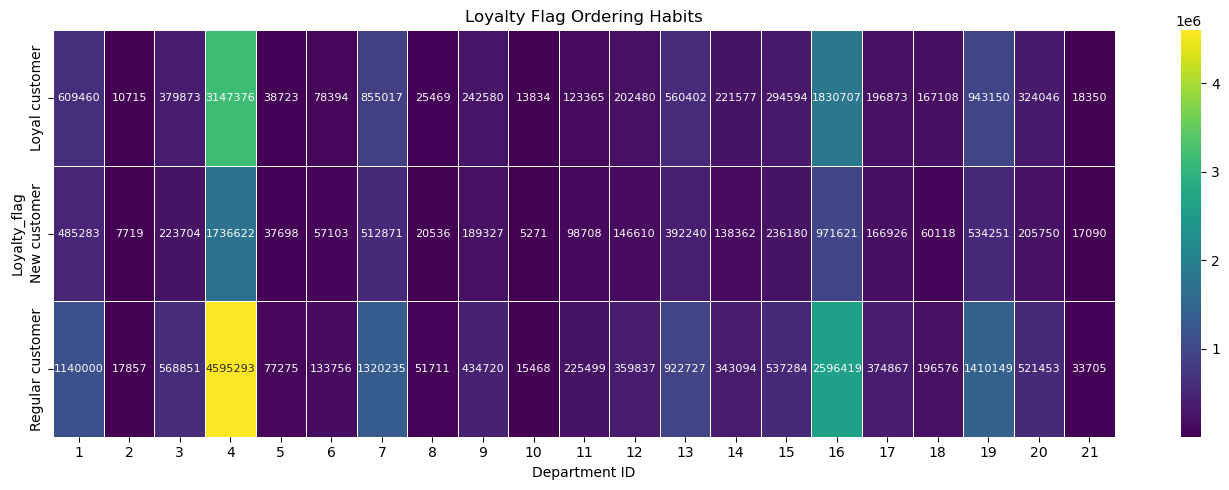

In [18]:
# Heat map to show loyalty_flag ordering Habits 
loyal_depart_heatmap = plt.figure(figsize=(14, 5))
sns.heatmap(ct_loyal_deprt, cmap='viridis', annot=True, fmt='d', linewidths=.5, annot_kws={"fontsize": 8})
plt.title('Loyalty Flag Ordering Habits')
plt.xlabel('Department ID')
plt.ylabel('Loyalty_flag')
plt.tight_layout()
plt.show()

In [22]:
#Export Visualisation
loyal_depart_heatmap.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','loyal_depart_heatmap.png'))